# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Obtain & Scrub Data

In [2]:
#Read mushroom data to csv
df = pd.read_csv('../mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#Replace class letters with numerical values
edible_dict = {'p':0, 'e':1}
df['class'] = df['class'].replace(edible_dict)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#Write function to create dummy variables for each mushroom characteristic
def create_dummies(df, column_name):
    dummies_df = pd.get_dummies(df[column_name])
    drop_column = dummies_df.columns[0]
    dummies_df.drop(drop_column, axis=1, inplace=True)
    dummy_column_names = []
    for dummy_col_name in dummies_df.columns:
        dummies_df.rename(columns={dummy_col_name:column_name+':'+dummy_col_name}, inplace=True)
    return dummies_df

#Create dummies for each mushroom characteristic using create_dummies function
mushroom_df = df[['class']]
for col_name in df.columns[1:]:
    mushroom_df = pd.concat([mushroom_df,create_dummies(df, col_name)], axis=1)
mushroom_df.head()

,class,cap-shape:c,cap-shape:f,cap-shape:k,cap-shape:s,cap-shape:x,cap-surface:g,cap-surface:s,cap-surface:y,cap-color:c,...,population:n,population:s,population:v,population:y,habitat:g,habitat:l,habitat:m,habitat:p,habitat:u,habitat:w
0,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Explore Data

In [5]:
#Calculate mushroom class balance
print('Edible Proportion:', mushroom_df['class'].mean())

Edible Proportion: 0.517971442639094


In [6]:
#Search for missing values in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   int64 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1295: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1295: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1295: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume 

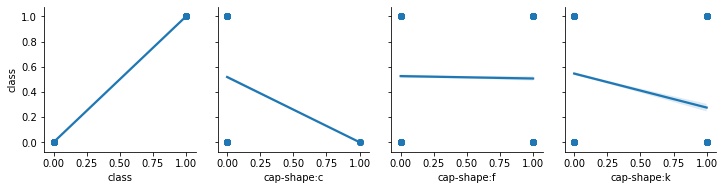

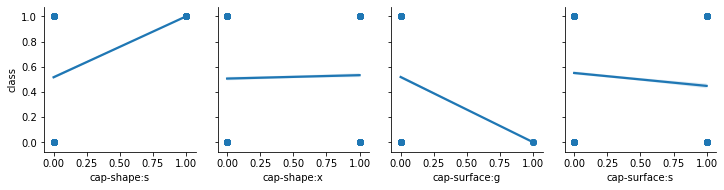

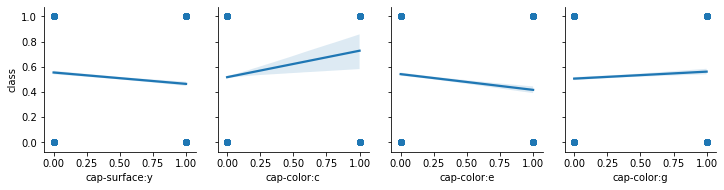

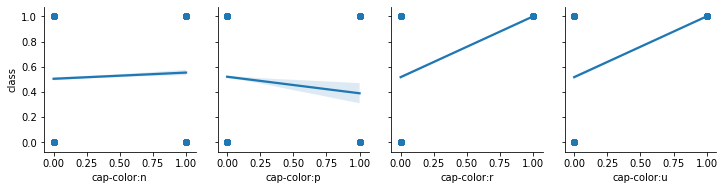

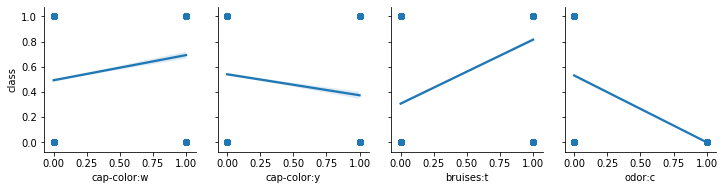

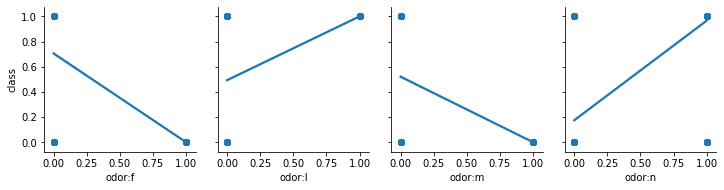

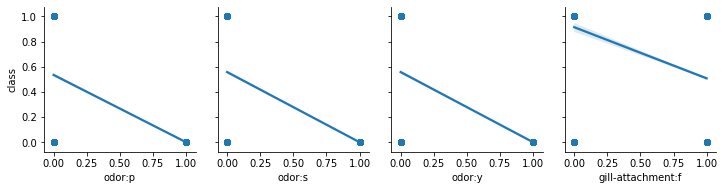

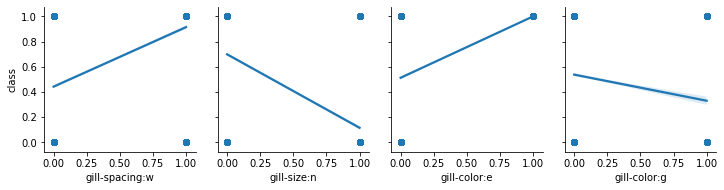

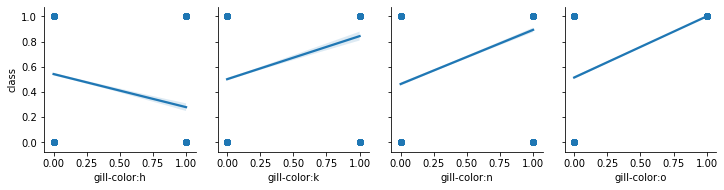

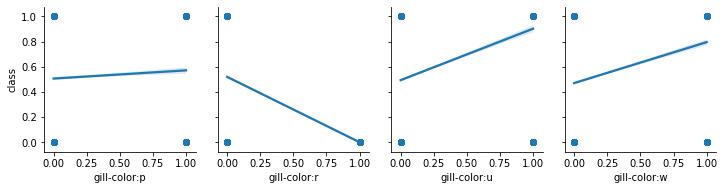

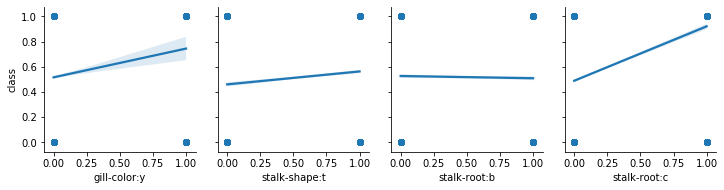

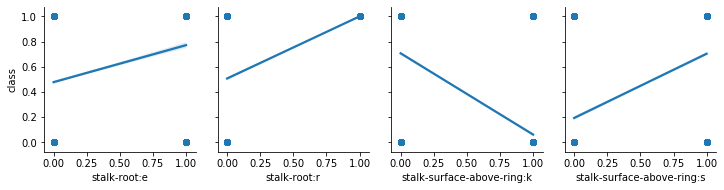

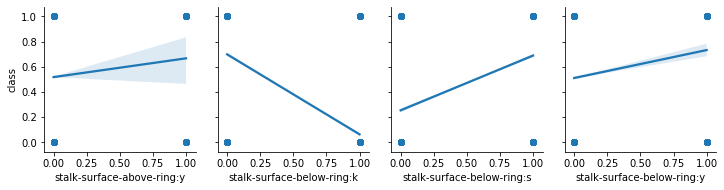

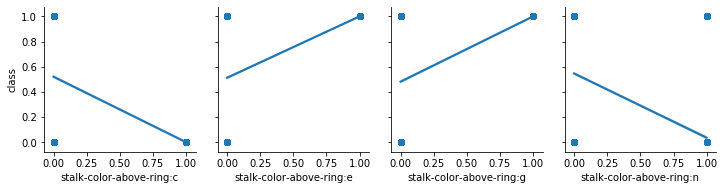

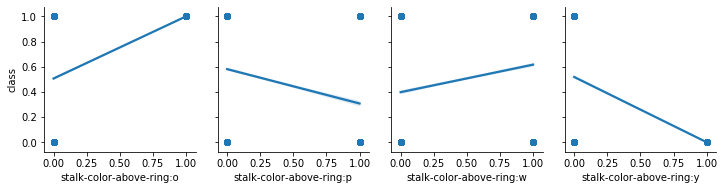

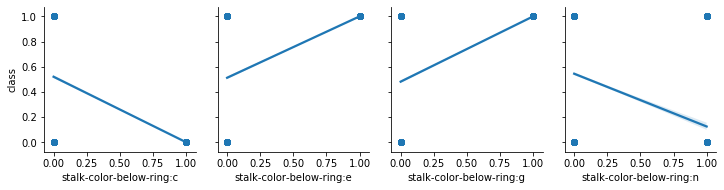

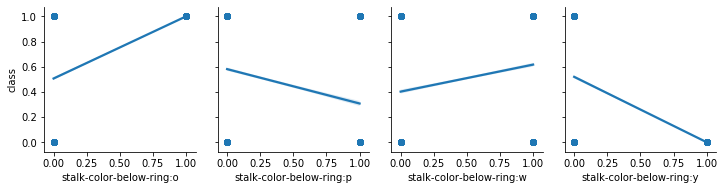

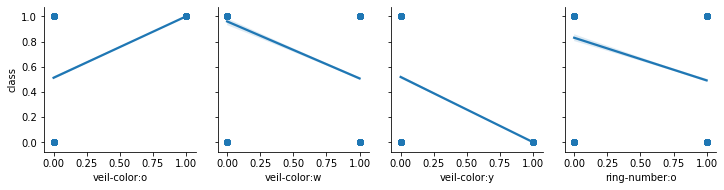

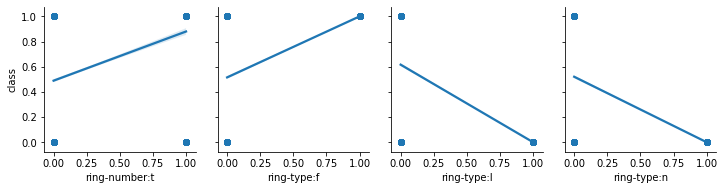

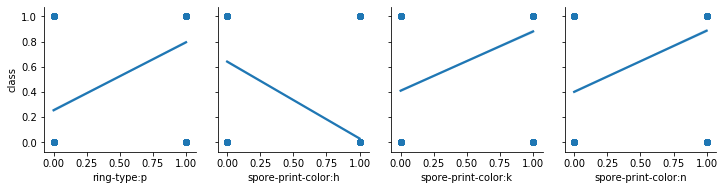

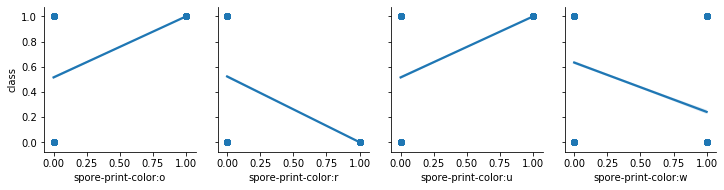

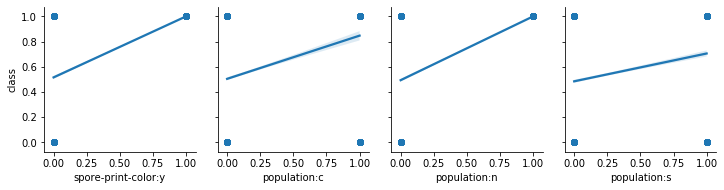

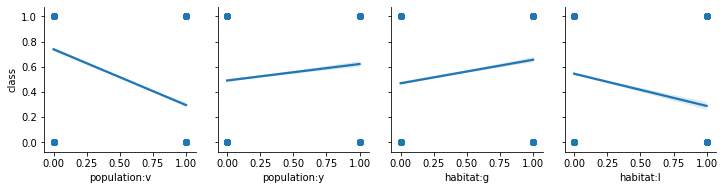

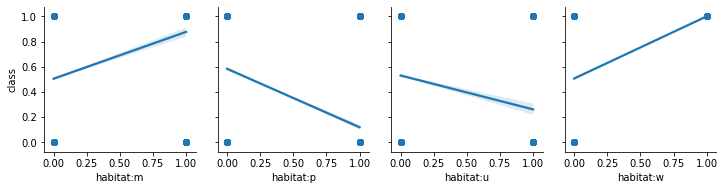

In [7]:
#Create pairplots showing relationship between each independent variable and class
pairplot_row_list = []
for num in range(0,int(len(mushroom_df.columns)/4)):
    pairplot_row_list.append(mushroom_df.columns[num*4:num*4+4])

for pairplot_row in pairplot_row_list:
    sns.pairplot(data=mushroom_df, y_vars = 'class', x_vars = pairplot_row, kind='reg')

/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


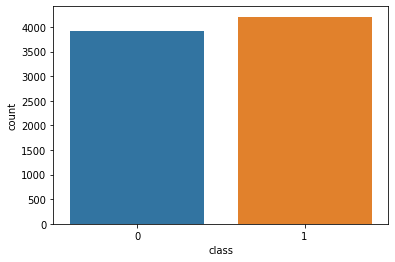

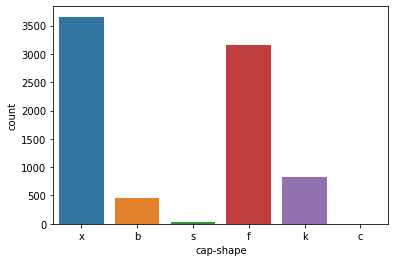

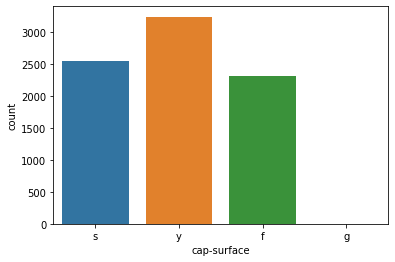

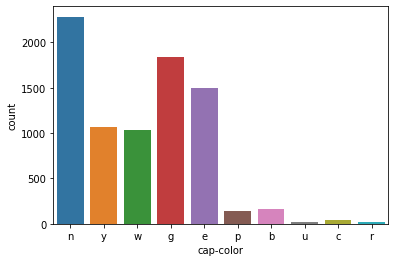

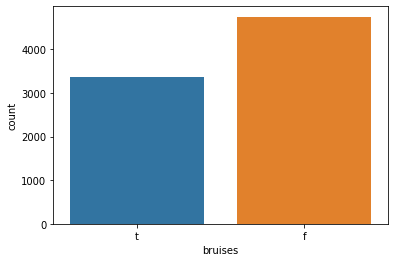

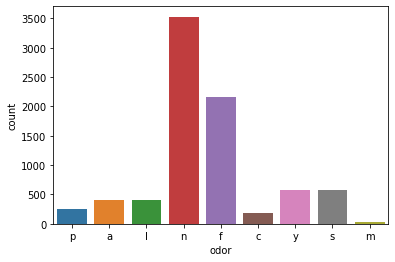

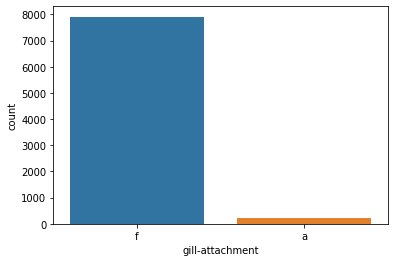

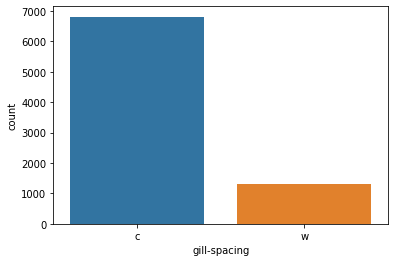

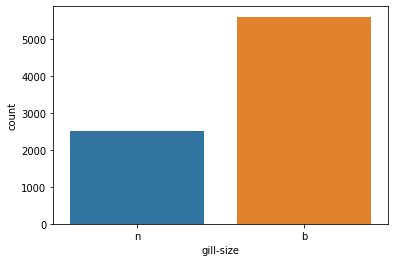

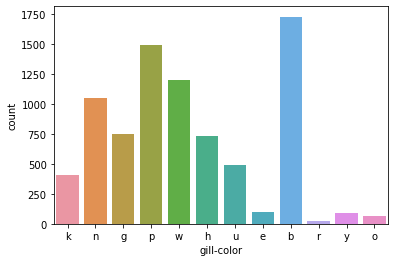

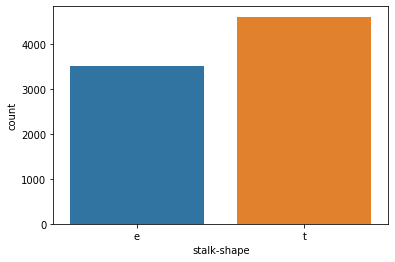

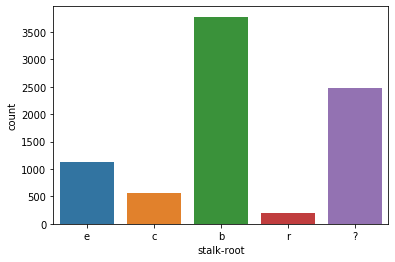

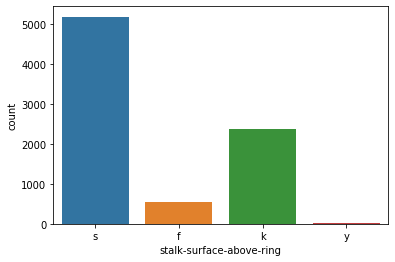

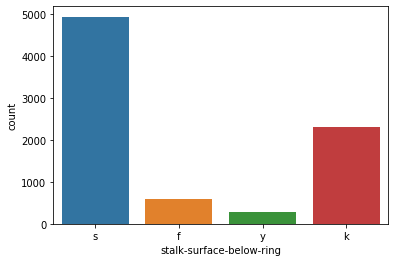

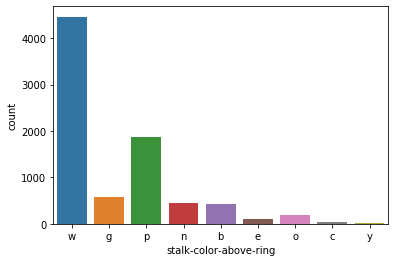

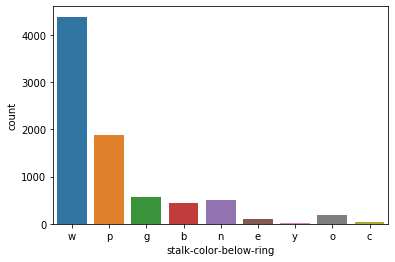

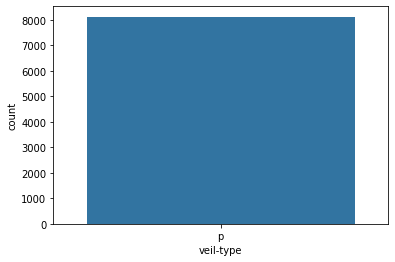

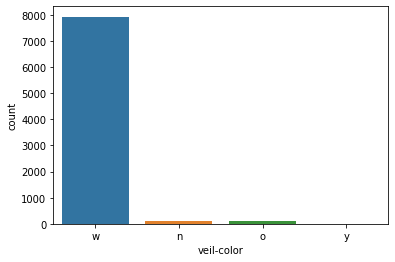

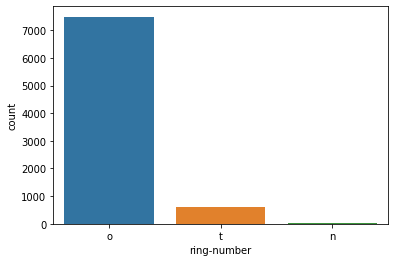

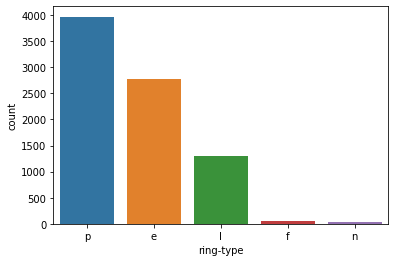

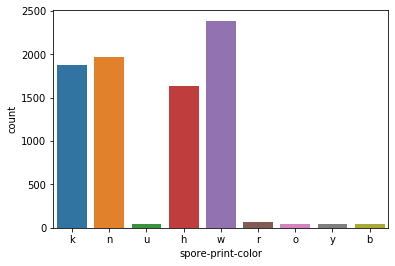

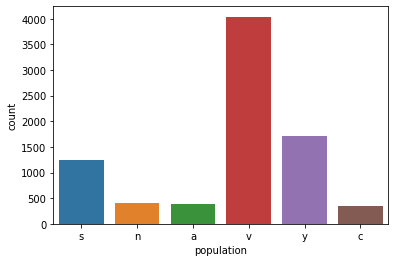

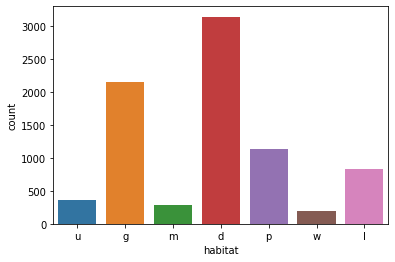

In [8]:
#Create countplot showing class distribution for each independent variable
for i, col in enumerate(df):
    plt.figure(i)
    sns.countplot(df[col])

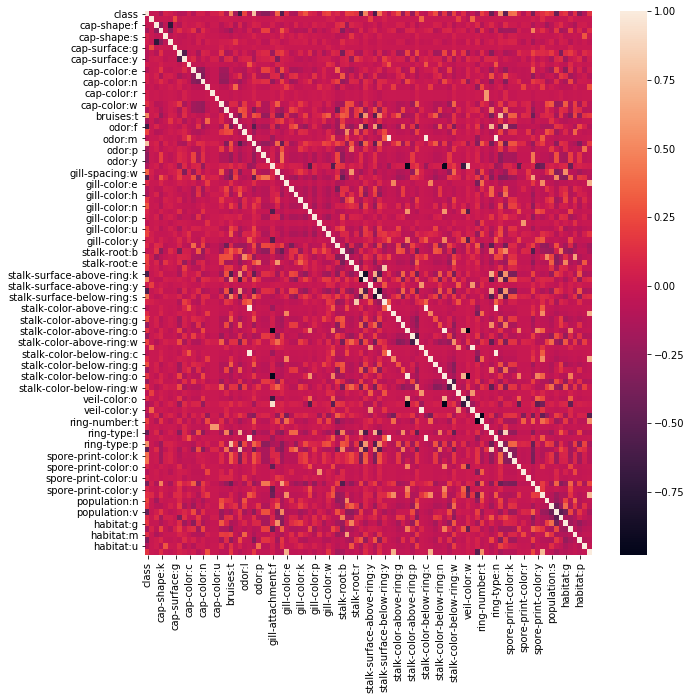

In [9]:
#Create heatmap showing correlated features
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
corr_table = mushroom_df.corr()
sns.heatmap(corr_table, ax = ax)

# Modeling

In [60]:
#Create x and y variables from data
x_vars = list(mushroom_df.columns)
x_vars.remove('class')
x = mushroom_df[x_vars]
y = mushroom_df['class']

In [61]:
#Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=27)

In [62]:
#Scale data using standard scaler
ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [63]:
#Build dummy classifier and calculate f1 score for training and test sets
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
y_train_pred_dummy = dummy.predict(x_train)
y_test_pred_dummy = dummy.predict(x_test)
print('train f1 score', f1_score(y_train, y_train_pred_dummy))
print('test f1 score', f1_score(y_test, y_test_pred_dummy))

train f1 score 0.5304128584935391
test f1 score 0.5242438790206433


/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [64]:
#Build KNN model and calculate f1 score for training and test sets
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_train_pred_knn = knn.predict(x_train)
y_test_pred_knn = knn.predict(x_test)
print('train f1 score', f1_score(y_train, y_train_pred_knn))
print('test f1 score', f1_score(y_test, y_test_pred_knn))

train f1 score 1.0
test f1 score 1.0


In [65]:
#Build Decision Tree model and calculate f1 score for training and test sets
tree = DecisionTreeClassifier(max_depth = 7)
tree.fit(x_train, y_train)
y_train_pred_tree = tree.predict(x_train)
y_test_pred_tree = tree.predict(x_test)
print('train f1 score', f1_score(y_train, y_train_pred_tree))
print('test f1 score', f1_score(y_test, y_test_pred_tree))

train f1 score 1.0
test f1 score 1.0


[Text(0, 0, 'odor:n'),
 Text(0, 0, 'stalk-root:c'),
 Text(0, 0, 'stalk-root:r'),
 Text(0, 0, 'spore-print-color:r'),
 Text(0, 0, 'spore-print-color:u'),
 Text(0, 0, 'odor:m'),
 Text(0, 0, 'stalk-surface-below-ring:y'),
 Text(0, 0, 'stalk-shape:t'),
 Text(0, 0, 'odor:l'),
 Text(0, 0, 'stalk-color-above-ring:n'),
 Text(0, 0, 'gill-spacing:w'),
 Text(0, 0, 'cap-surface:g'),
 Text(0, 0, 'population:c'),
 Text(0, 0, 'cap-shape:c'),
 Text(0, 0, 'gill-size:n'),
 Text(0, 0, 'spore-print-color:w'),
 Text(0, 0, 'habitat:m'),
 Text(0, 0, 'stalk-color-below-ring:w'),
 Text(0, 0, 'stalk-color-below-ring:p'),
 Text(0, 0, 'stalk-color-below-ring:o')]

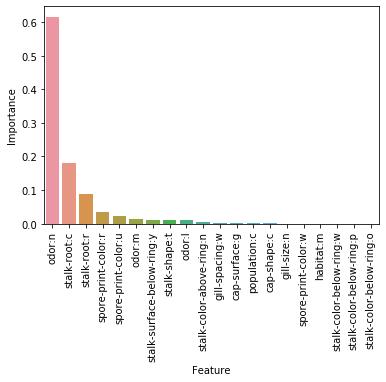

In [66]:
#Create feature importance graph for Decision Tree model
feature_importances = pd.concat([pd.DataFrame(x_vars), pd.DataFrame(tree.feature_importances_)], axis=1)
feature_importances.columns = ['Feature', 'Importance']
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
importance_plot = sns.barplot(x='Feature', y='Importance', data=feature_importances[0:20],)
importance_plot.set_xticklabels(feature_importances['Feature'], rotation=90)